In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sci

In [ ]:
#Ładowanie z wybranego pliku .txt
file_name = "..//src//"+input("Podaj nazwe pliku z danymi: ")

data_frame = pd.read_csv(file_name,sep="\\s+",header=None,engine="python")


             0         1
0     0.000000 -0.325000
1     0.002778 -0.273038
2     0.005556 -0.268038
3     0.008333 -0.320000
4     0.011111 -0.391962
...        ...       ...
3196  8.877778 -0.306962
3197  8.880556 -0.316962
3198  8.883333 -0.270000
3199  8.886111 -0.233038
3200  8.888889 -0.233038

[3201 rows x 2 columns]


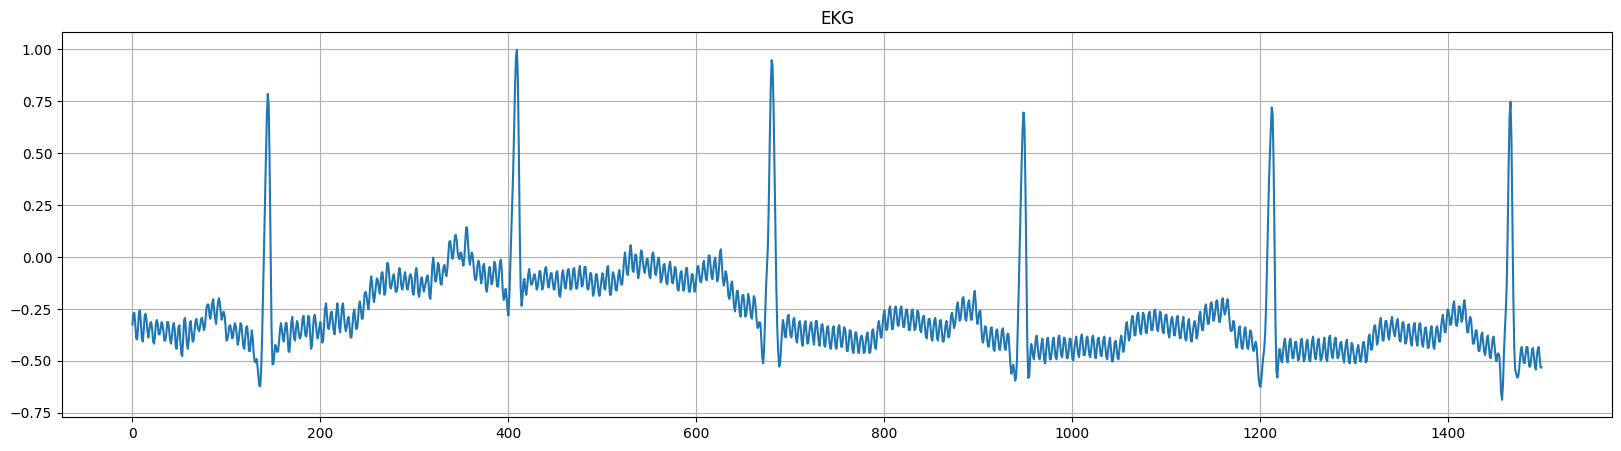

In [16]:
#Wykres EKG (Na podstawie pobranych danych) w zakresie start : end
num_rows = len(data_frame)
start = input("Początek zakresu(Minimalnie 0): ")
end = input("Koniec zakresu(Maksymalnie "+str( num_rows )+"): ")
if start == "":
    start = 0
if end == "":
    end = num_rows
start = int(start)
end = int(end)

data_frame.columns = ['I','data']
new_data = data_frame.iloc[int( start ):int( end )].copy()
font = {'size':20}
plt.figure(figsize=(20,5))
plt.plot(new_data['data'])
plt.grid(True)
plt.title("EKG")
plt.show()

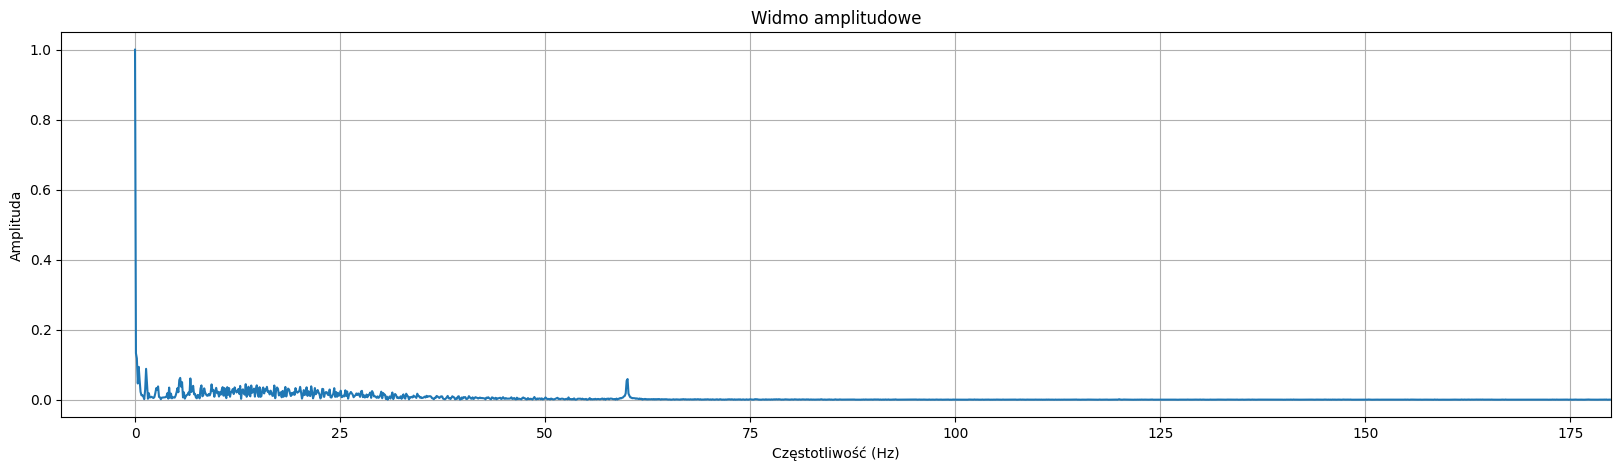

In [17]:
#Generacja i wyświetlenie widma sygnału
fs = 360
t = len(data_frame)

fourier1 = np.fft.fft(data_frame['data'])

widmo = np.abs(fourier1)
abs_widmo = widmo / np.max(widmo)
freq = np.fft.fftfreq(t,1/fs)
pos_freq = freq[:len(freq)//2]
pos_widmo = abs_widmo[:len(abs_widmo)//2]

plt.figure(figsize=(20,5))
plt.plot(pos_freq,pos_widmo)
plt.xlim(right = fs/2)
plt.grid(True)
plt.title("Widmo amplitudowe")
plt.xlabel('Częstotliwość (Hz)')
plt.ylabel('Amplituda')

plt.show()


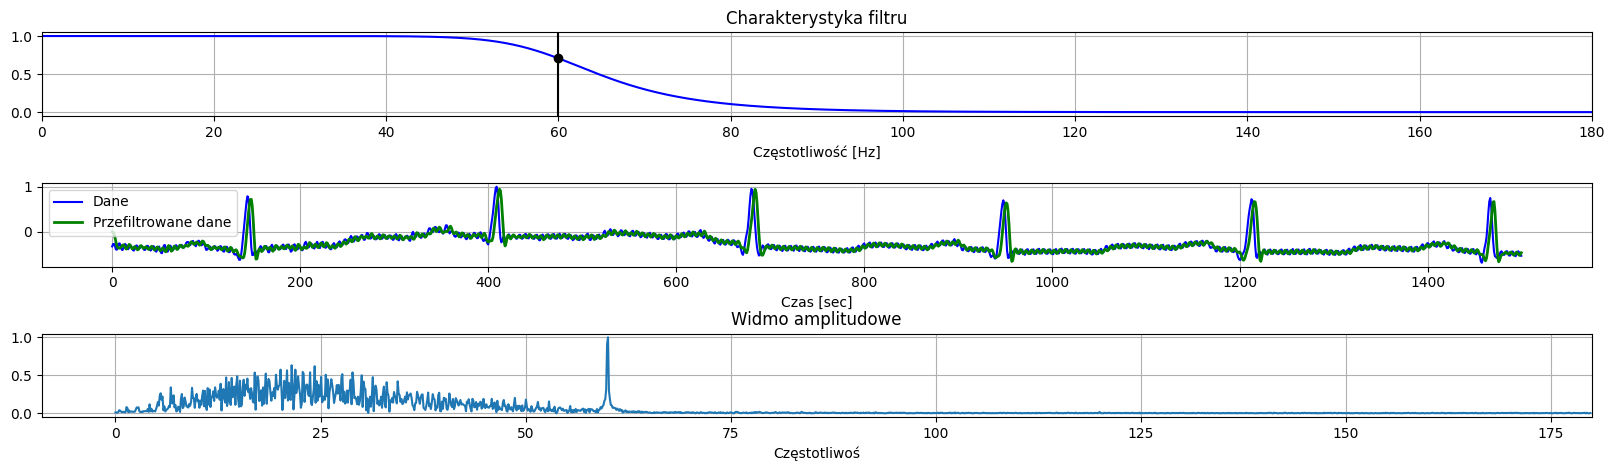

In [18]:
#Zastosowanie dolnoprzepustowego filtru Butterwortha
order = 6
fs = 360
cutoff = 60  

b,a = sci.butter(order,cutoff,fs=fs,btype='low',analog=False)

w, h = sci.freqz(b, a, fs=fs, worN=8000)

plt.figure(figsize=(20,5))
plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Charakterystyka filtru")
plt.xlabel('Częstotliwość [Hz]')
plt.grid()

y = sci.lfilter(b, a, data_frame['data'])

plt.subplot(3, 1, 2)
plt.plot(data_frame['data'][start:end] , 'b-', label='Dane')
plt.plot( y[start:end], 'g-', linewidth=2, label='Przefiltrowane dane')
plt.legend()
plt.xlabel('Czas [sec]')
plt.grid()

fourier1 = np.fft.fft(data_frame['data']-y)

widmo = np.abs(fourier1)
abs_widmo = widmo / np.max(widmo)
freq = np.fft.fftfreq(t,1/fs)
pos_freq = freq[:len(freq)//2]
pos_widmo = abs_widmo[:len(abs_widmo)//2]

plt.subplot(3,1,3)
plt.plot(pos_freq,pos_widmo)
plt.xlim(right = fs/2)
plt.grid(True)
plt.title("Widmo amplitudowe")
plt.xlabel('Częstotliwoś')

plt.subplots_adjust(hspace=0.8)
plt.show()


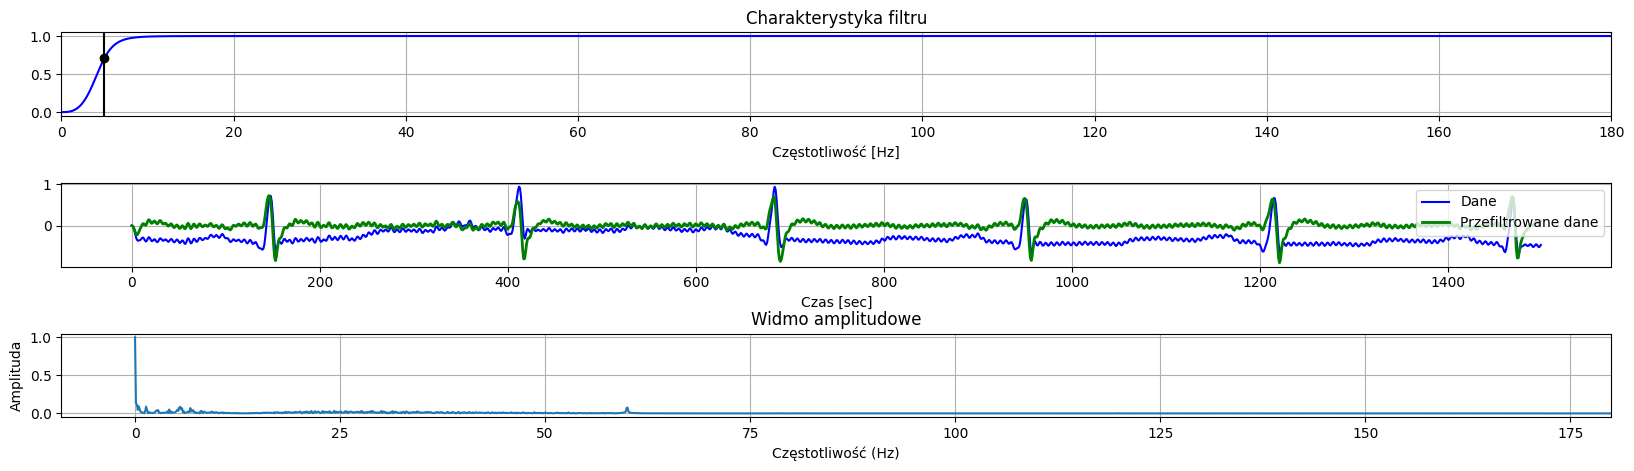

In [19]:
#Zastosowanie górnoprzepustowego filtru Butterwortha
order = 3
fs = 360
cutoff = 5

b,a = sci.butter(order,cutoff,fs=fs,btype='hp',analog=False)

w, h = sci.freqz(b, a, fs=fs, worN=8000)
hy = sci.lfilter(b, a, y)

plt.figure(figsize=(20,5))

plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Charakterystyka filtru")
plt.xlabel('Częstotliwość [Hz]')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(y[start:end] , 'b-', label='Dane')
plt.plot( hy[start:end], 'g-', linewidth=2, label='Przefiltrowane dane')
plt.legend()
plt.xlabel('Czas [sec]')
plt.grid()

fourier1 = np.fft.fft(data_frame['data']-hy)

widmo = np.abs(fourier1)
abs_widmo = widmo / np.max(widmo)
freq = np.fft.fftfreq(t,1/fs)
pos_freq = freq[:len(freq)//2]
pos_widmo = abs_widmo[:len(abs_widmo)//2]

plt.subplot(3,1,3)
plt.plot(pos_freq,pos_widmo)
plt.xlim(right = fs/2)
plt.grid(True)
plt.title("Widmo amplitudowe")
plt.xlabel('Częstotliwość (Hz)')
plt.ylabel('Amplituda')

plt.subplots_adjust(hspace=0.8)
plt.show()